In [4]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10,10))
mpl.rc('image', cmap='gray')

In [5]:
pip install pims

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install trackpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import cv2
import math
import scipy
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

In [9]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  

frames = gray(pims.Video(r'/Users/rohan/Desktop/college/surge/temp-06182023105454-0000.avi'))

deprecated pixel format used, make sure you did set range correctly


In [110]:
frames[0].shape

(2040, 2636)

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
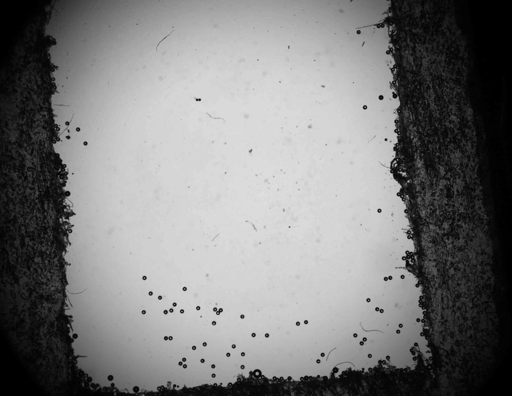

In [111]:
frames[0]

Frame([[155, 155, 155, ..., 173, 173, 173],
       [155, 155, 155, ..., 173, 173, 173],
       [155, 155, 155, ..., 172, 172, 172],
       ...,
       [128, 128, 128, ..., 155, 155, 155],
       [128, 128, 128, ..., 155, 155, 155],
       [128, 128, 128, ..., 155, 155, 155]], dtype=uint8)
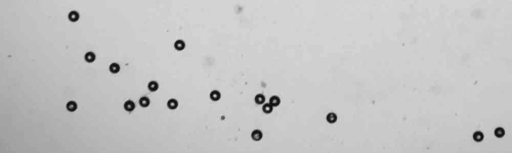

In [155]:
img = frames[0][1400:1700,600:1600]
img

In [156]:
binary_frames = np.zeros((len(frames),300,1000))

In [159]:
for i in range(len(frames)):
    ret, binary_frame = cv2.threshold(frames[i][1400:7800,600:1600], 50, 255, cv2.THRESH_BINARY)
    resized_binary_frame = cv2.resize(binary_frame, (1000,300))
    binary_frames[i] = resized_binary_frame

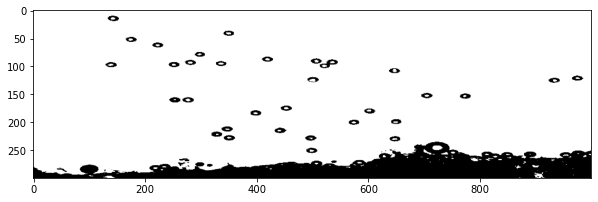

In [160]:
plt.imshow(binary_frames[0])

In [161]:
f = tp.batch(binary_frames[::],23, invert=True, minmass=100 ); 

Frame 4023: 41 features


In [162]:
f.head(50)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,14.442318,143.781059,20137.177839,6.119589,0.410462,208.406563,-64793.0,0.107573,0
1,40.949457,350.522626,18008.028339,5.886527,0.401413,211.809119,-68641.0,0.123635,0
2,51.988914,175.914222,18415.484436,5.859413,0.413028,211.809119,-68127.0,0.121217,0
3,61.871206,223.309975,18803.375835,5.814454,0.449190,210.107841,-67504.0,0.118411,0
4,78.664992,298.997367,17444.054659,5.425190,0.405397,209.257202,-69278.0,0.126768,0
5,87.243849,419.919496,18565.196906,5.985354,0.453501,210.107841,-67862.0,0.120007,0
6,90.506218,506.472721,16963.443605,5.866576,0.430758,209.257202,-67577.0,0.118733,0
7,94.009553,533.827002,22883.891278,6.845016,0.430971,209.257202,-55367.0,0.081603,0
8,95.148007,336.650826,17201.622535,5.867491,0.399615,207.555924,-70079.0,0.130941,0
9,97.058919,140.051063,18840.803952,6.027321,0.411739,210.107841,-67230.0,0.117217,0


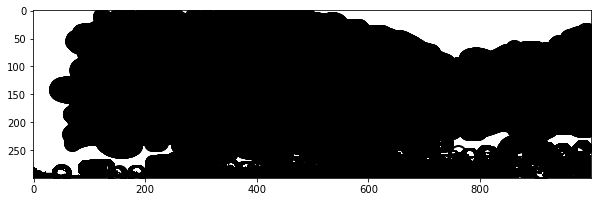

In [163]:
tp.annotate(f,binary_frames[0],color='black');

In [164]:
t = tp.link(f,30, memory=3000)

Frame 4023: 41 trajectories present.


In [185]:
npart=len(t['particle'].unique())
npart

92

In [171]:
a=[]
for i in range(npart):
    df=t[t['particle']==i]
    df.drop(df.columns[[0,1,4,5,6,7]], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['Radius in um']=df['size']*2.227*2
    df['Diameter']=df['Radius in um']*2
    df['Time in sec']=df['frame']*0.25
    n=df.shape[0]
    rate=abs((df['Radius in um'][0]-df['Radius in um'][n-1])/(df['Time in sec'][n-1]-df['Time in sec'][0]))
    a.append(rate)

C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\4202747136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[[0,1,4,5,6,7]], axis=1, inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\4202747136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Radius in um']=df['size']*2.227*2
C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\4202747136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [172]:
a

[0.0009652310558454895,
 0.004789532288357624,
 0.0013193286994855156,
 0.0008694241579469189,
 0.00023493513955538686,
 0.0005216515922698474,
 0.0006735620337416728,
 0.006345934840631011,
 0.0009429500839279846,
 0.0033815222245940166,
 0.0014151096365211454,
 0.0029883325366193087,
 0.0007685255942523617,
 0.0004697749369860397,
 1.8755434469070644e-05,
 0.002545145768593525,
 5.503825510910182e-05,
 0.0001533631817167914,
 0.0030764546979021555,
 2.7094574771393497e-05,
 0.0011381869509086173,
 0.0010122054154338897,
 0.002331583312321056,
 0.0025444981102439217,
 0.001184409609348359,
 0.001781843023394745,
 0.024746097769648197,
 0.00025256739884121763,
 0.00020812649490760935,
 0.0019518215126454815,
 0.030339417062351094,
 0.00012385912883901623,
 0.00440843160220478,
 0.0008682876957754374,
 0.007886160798310159,
 0.30771513378529114,
 0.0025623709948867004,
 0.010606268542527726,
 0.000205812396468775,
 0.0019656754618191654,
 0.0033430448472035984,
 0.001525902565812589,
 0

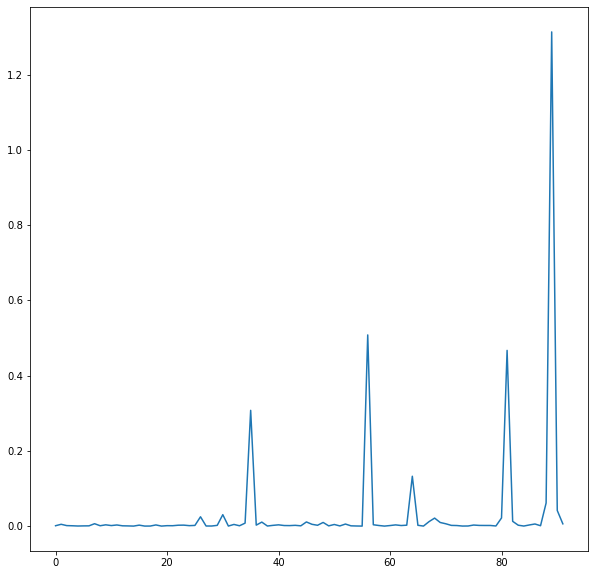

In [177]:

c=np.arange(npart)
plt.plot(c,a)

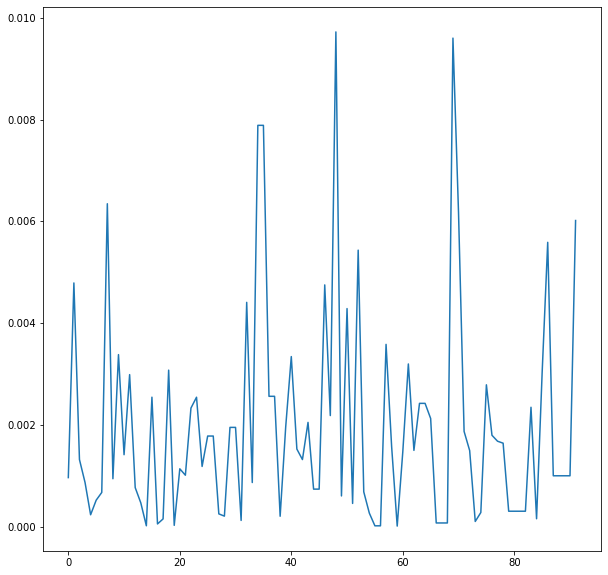

In [179]:
d=a
for i in range(1,npart):
    if(d[i]>0.01):
        d[i]=d[i-1]
plt.plot(c,d)        

In [165]:
df=t[t['particle']==0]
df

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,14.442318,143.781059,20137.177839,6.119589,0.410462,208.406563,-64793.0,0.107573,0,0
49,14.486815,144.365068,19456.817806,5.929643,0.383486,206.761129,-66032.0,0.111513,1,0
97,14.628410,145.422109,19274.852077,5.952801,0.362634,209.509262,-66071.0,0.110365,2,0
147,14.729812,145.721888,19492.847587,6.005810,0.394524,208.475140,-65835.0,0.111081,3,0
195,14.765385,146.674751,18649.755827,5.976133,0.416529,212.657849,-67604.0,0.119472,4,0
...,...,...,...,...,...,...,...,...,...,...
175331,93.493600,169.289611,18510.812794,5.968971,0.454753,210.150347,-68029.0,0.132785,4019,0
175372,93.632196,169.026814,17898.780777,5.837059,0.462234,212.281621,-69138.0,0.141099,4020,0
175413,93.873558,168.940506,18821.360574,5.815894,0.424888,210.425149,-67319.0,0.130548,4021,0
175454,94.023547,168.748670,18399.658709,5.768686,0.410459,210.769307,-68126.0,0.136860,4022,0


In [135]:
df.drop(df.columns[[0,1,4,5,6,7]], axis=1, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\2399389380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[[0,1,4,5,6,7]], axis=1, inplace=True)


In [136]:

df.reset_index(drop=True, inplace=True)
df

,mass,size,frame,particle
0,34235.697860,7.373408,0,0
1,34198.078695,7.378642,1,0
2,34375.286521,7.384651,2,0
3,34065.135088,7.478850,3,0
4,34605.258574,7.480939,4,0
...,...,...,...,...
1576,22370.173855,6.777656,3430,0
1577,20914.958771,6.625380,3431,0
1578,19305.080463,6.837359,3432,0
1579,18662.874006,6.815800,3433,0


In [137]:
df['Radius in um']=df['size']*2.227*2
df['Diameter']=df['Radius in um']*2

C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\2493922949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Radius in um']=df['size']*2.227*2
C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\2493922949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diameter']=df['Radius in um']*2


In [138]:

df['Time in sec']=df['frame']*0.25
df

C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\1235320971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time in sec']=df['frame']*0.25


,mass,size,frame,particle,Radius in um,Diameter,Time in sec
0,34235.697860,7.373408,0,0,32.841161,65.682322,0.00
1,34198.078695,7.378642,1,0,32.864471,65.728943,0.25
2,34375.286521,7.384651,2,0,32.891234,65.782469,0.50
3,34065.135088,7.478850,3,0,33.310797,66.621595,0.75
4,34605.258574,7.480939,4,0,33.320101,66.640202,1.00
...,...,...,...,...,...,...,...
1576,22370.173855,6.777656,3430,0,30.187681,60.375362,857.50
1577,20914.958771,6.625380,3431,0,29.509443,59.018885,857.75
1578,19305.080463,6.837359,3432,0,30.453597,60.907194,858.00
1579,18662.874006,6.815800,3433,0,30.357575,60.715150,858.25


In [139]:
df['-dR/dT in um/s']=df['Radius in um']*0
for i in range(len(df['Radius in um'])-100):
    df['-dR/dT in um/s'][i]=(df['Radius in um'][i]-df['Radius in um'][i+1])


C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\3700226945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['-dR/dT in um/s']=df['Radius in um']*0
C:\Users\rohan\AppData\Local\Temp\ipykernel_17376\3700226945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['-dR/dT in um/s'][i]=(df['Radius in um'][i]-df['Radius in um'][i+1])


In [140]:
df

,mass,size,frame,particle,Radius in um,Diameter,Time in sec,-dR/dT in um/s
0,34235.697860,7.373408,0,0,32.841161,65.682322,0.00,-0.023310
1,34198.078695,7.378642,1,0,32.864471,65.728943,0.25,-0.026763
2,34375.286521,7.384651,2,0,32.891234,65.782469,0.50,-0.419563
3,34065.135088,7.478850,3,0,33.310797,66.621595,0.75,-0.009304
4,34605.258574,7.480939,4,0,33.320101,66.640202,1.00,-0.557812
...,...,...,...,...,...,...,...,...
1576,22370.173855,6.777656,3430,0,30.187681,60.375362,857.50,0.000000
1577,20914.958771,6.625380,3431,0,29.509443,59.018885,857.75,0.000000
1578,19305.080463,6.837359,3432,0,30.453597,60.907194,858.00,0.000000
1579,18662.874006,6.815800,3433,0,30.357575,60.715150,858.25,0.000000
